# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

**covid_vaccine_statewise.csv downloaded from:**   https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india?datasetId=557629&sortBy=voteCount

**covid_19_india.csv, AgeGroupDetails.csv, ICMRTestingLabs.csv, IndividualDetails.csv downloaded from:** https://www.kaggle.com/code/anshuls235/covid19-explained-through-visualizations/data

**Covid_19_India.csv**

In [59]:
df_c19 = pd.read_csv('data/covid_19_india.csv', parse_dates = ['Date'])
df_c19

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [41]:
df_c19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [3]:
df_c19.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [10]:
df_c19['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [60]:
df_c19['State/UnionTerritory'].replace({'Telengana': 'Telangana', 'Maharashtra***': 'Maharashtra', 'Bihar****': 'Bihar', 
                                  'Madhya Pradesh***': 'Madhya Pradesh', 'Himanchal Pradesh': 'Himachal Pradesh',
                                   'Karanataka': 'Karnataka'}, inplace = True)
df_c19['State/UnionTerritory'].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Dadra and Nagar Haveli'], dtype=object)

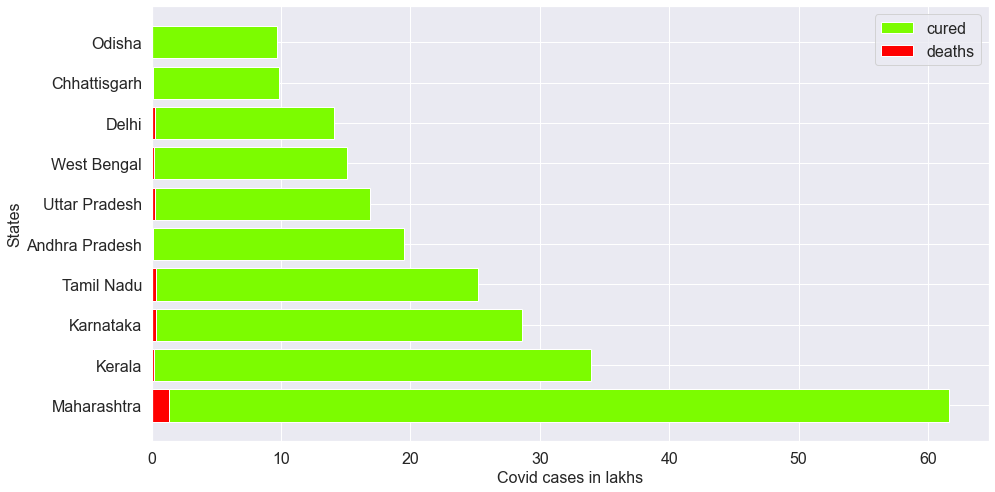

In [81]:
deaths = df_c19.groupby('State/UnionTerritory')['Deaths'].max()
cured = df_c19.groupby('State/UnionTerritory')['Cured'].max()
confirmed = df_c19.groupby('State/UnionTerritory')['Confirmed'].max()
states = deaths.index

pn = pd.DataFrame({'states': states, 'deaths': deaths, 'cured': cured, 'confirmed': confirmed})
pn.reset_index(drop = True, inplace = True)
pn = pn.sort_values('confirmed', ascending = False)[:10]

plt.figure(figsize = (15, 8))
plt.barh(pn['states'], pn['cured']/100000, color = 'lawngreen')
plt.barh(pn['states'], pn['deaths']/100000, color = 'red')
plt.xlabel('Covid cases in lakhs', fontsize = 16)
plt.ylabel('States', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['cured', 'deaths'], loc = 'upper right', fontsize = 16)
plt.show()

Maharashtra has the maximim number of Covid cases.

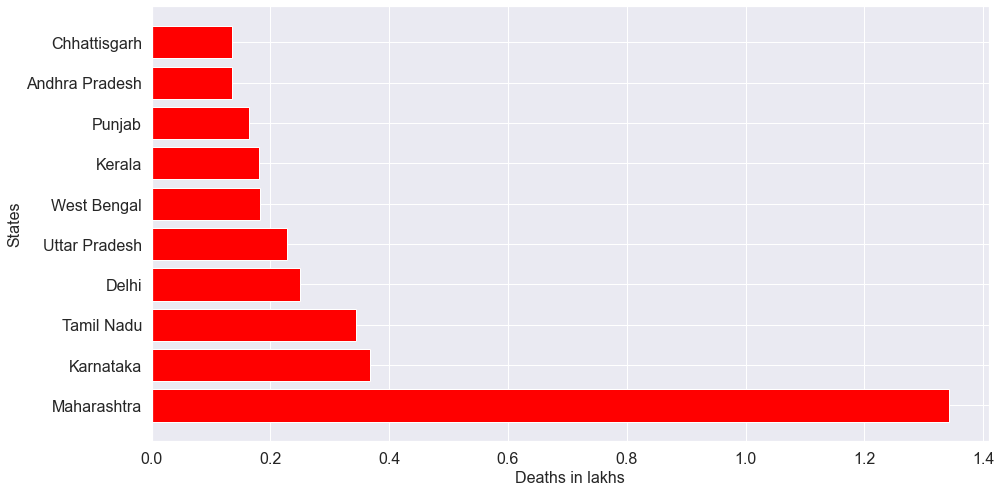

In [61]:
deaths = df_c19.groupby('State/UnionTerritory')['Deaths'].max().sort_values(ascending = False)[:10]
index = deaths.index
values = deaths.values/100000
plt.figure(figsize = (15, 8))
#plt.rcParams['font.size'] = '16'
plt.barh(index, values, color = 'red')
plt.xlabel('Deaths in lakhs', fontsize = 16)
plt.ylabel('States', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Maharashtra has the maximum number of deaths as compared to rest of the states.

In [15]:
df_c19.to_csv('data/covid_19_india_preprocessed.csv', index = False)

**covid_vaccine_statewise.csv**

In [7]:
df_vac = pd.read_csv('data/covid_vaccine_statewise.csv')
df_vac

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [6]:
df_vac.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

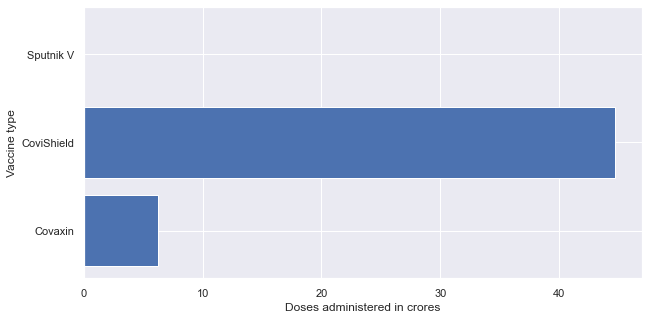

In [10]:
values = [df_vac[' Covaxin (Doses Administered)'].max(), df_vac['CoviShield (Doses Administered)'].max(), df_vac['Sputnik V (Doses Administered)'].max()]
values = np.array(values)/10000000
index = ['Covaxin', 'CoviShield', 'Sputnik V']
plt.figure(figsize = (10, 5))
plt.barh(index, values)
plt.xlabel('Doses administered in crores')
plt.ylabel('Vaccine type')
plt.show()

Most of the people have taken CoviShield dose

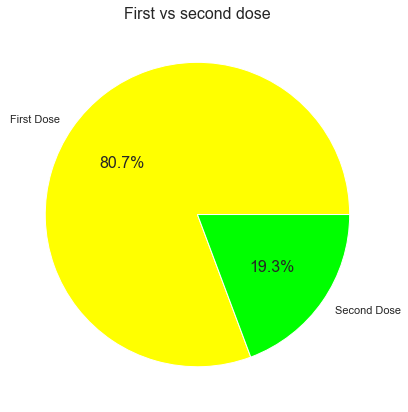

In [14]:
doses = [df_vac['First Dose Administered'].sum(), df_vac['Second Dose Administered'].sum()]
index = ['First Dose', 'Second Dose']
values = doses
plt.figure(figsize = (10,7))
plt.rcParams['font.size'] = '16'
plt.pie(values, labels = index, autopct='%1.1f%%', colors = ['yellow', 'lime'])
plt.title('First vs second dose', fontsize = 16)
plt.show()

Only 19% people have taken 2nd dose

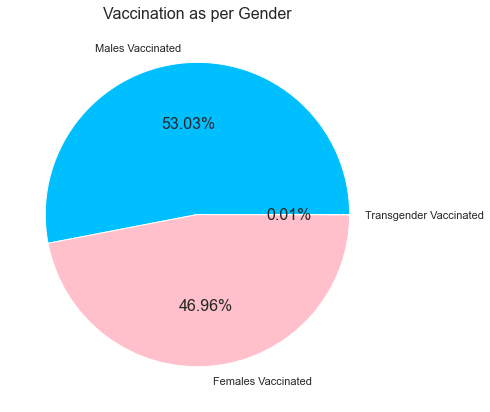

In [15]:
doses = [df_vac['Male(Individuals Vaccinated)'].sum(), df_vac['Female(Individuals Vaccinated)'].sum(), df_vac['Transgender(Individuals Vaccinated)'].sum()]
index = ['Males Vaccinated', 'Females Vaccinated', 'Transgender Vaccinated']
values = doses
plt.figure(figsize = (10,7))
plt.rcParams['font.size'] = '16'
plt.pie(values, labels = index, autopct='%1.2f%%', colors = ['deepskyblue', 'pink', 'grey'])
plt.title('Vaccination as per Gender', fontsize = 16)
plt.show()

Out of the total individuals vaccinated, 53% are male, 46.96% female & 0.01% trans

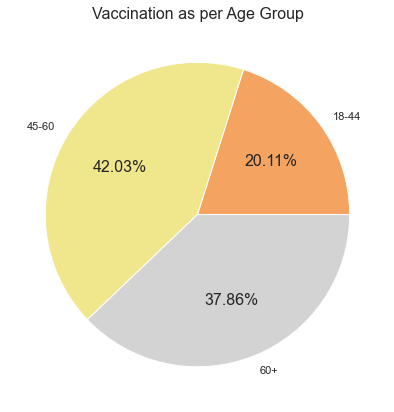

In [12]:
values = [df_vac['18-44 Years(Individuals Vaccinated)'].sum(), df_vac['45-60 Years(Individuals Vaccinated)'].sum(), df_vac['60+ Years(Individuals Vaccinated)'].sum()]
values = np.array(values)/1000000000
index = ['18-44', '45-60', '60+']
plt.figure(figsize = (10, 7))
plt.rcParams['font.size'] = '16'
#plt.bar(index, values)
#plt.xlabel('Age group')
#plt.ylabel('Vaccinated in billions')
plt.pie(values, labels = index, autopct='%1.2f%%', colors = ['sandybrown', 'khaki', 'lightgrey'])
plt.title('Vaccination as per Age Group', fontsize = 16)
plt.show()

People belonging to age group 18-44 years are least vaccinated as compared to the other two groups.

**IndividualDetails.csv**

In [2]:
df_ind_det = pd.read_csv('data/IndividualDetails.csv')
df_ind_det

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
28177,28178,NaN,22/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,Correction for district count
28178,28179,NaN,24/04/2020,NaN,NaN,NaN,Nagpur,Maharashtra,NaN,Hospitalized,NaN,Correction for district count
28179,28180,NaN,24/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,Correction for district count
28180,28181,NaN,25/04/2020,NaN,NaN,NaN,Nagpur,Maharashtra,NaN,Hospitalized,NaN,Correction for district count


In [18]:
df_ind_det.isnull().sum()

id                        0
government_id         25185
diagnosed_date            0
age                   25836
gender                22869
detected_city         25832
detected_district      6984
detected_state            0
nationality           25473
current_status            0
status_change_date      402
notes                  1335
dtype: int64

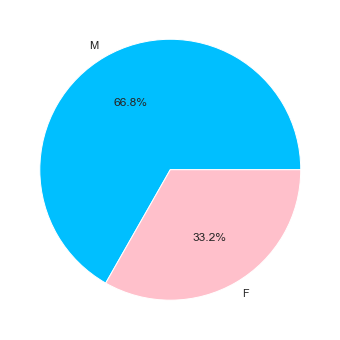

In [48]:
types = df_ind_det['gender'].value_counts()
index = types.index
values = types.values
plt.figure(figsize = (8,6))
plt.pie(values, labels = index, autopct='%1.1f%%', colors = ['deepskyblue', 'pink'])
plt.show()

The number of affected males is twice to that of females.

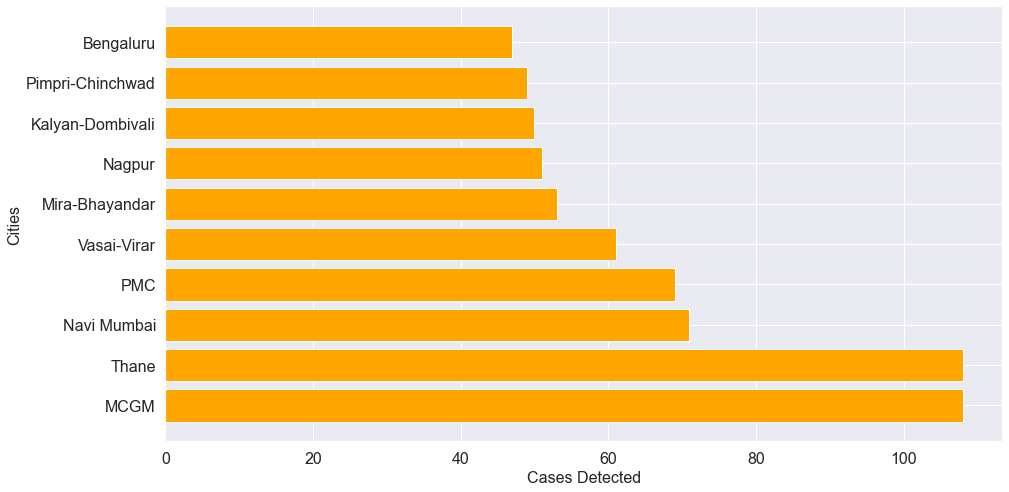

In [5]:
dete = df_ind_det['detected_city'].value_counts().sort_values(ascending = False)[:10]
index = dete.index
values = dete.values
plt.figure(figsize = (15, 8))
#plt.rcParams['font.size'] = '16'
plt.barh(index, values, color = 'orange')
plt.xlabel('Cases Detected', fontsize = 16)
plt.ylabel('Cities', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Most of cases detected are in cities of Maharashtra.

**ICMRTestingLabs.csv**

In [20]:
df_icmr = pd.read_csv('data/ICMRTestingLabs.csv')
df_icmr

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory
...,...,...,...,...,...,...
262,"Tata Medical Center, Kolkata","Department of Laboratory Sciences, Tata Medica...",700160,Kolkata,West Bengal,Private Laboratory
263,"Laboratory Services, Peerless Hospitex Hospita...","Laboratory Services, Peerless Hospitex Hospita...",700094,Kolkata,West Bengal,Private Laboratory
264,"AMRI Hospitals, Department of Laboratory Medic...","AMRI Hospitals, Department of Laboratory Medic...",700098,Kolkata,West Bengal,Private Laboratory
265,"Suraksha Diagnostics Pvt. Ltd., Kolkata","Suraksha Diagnostics Pvt. Ltd., 12/1, Premises...",700156,Kolkata,West Bengal,Private Laboratory


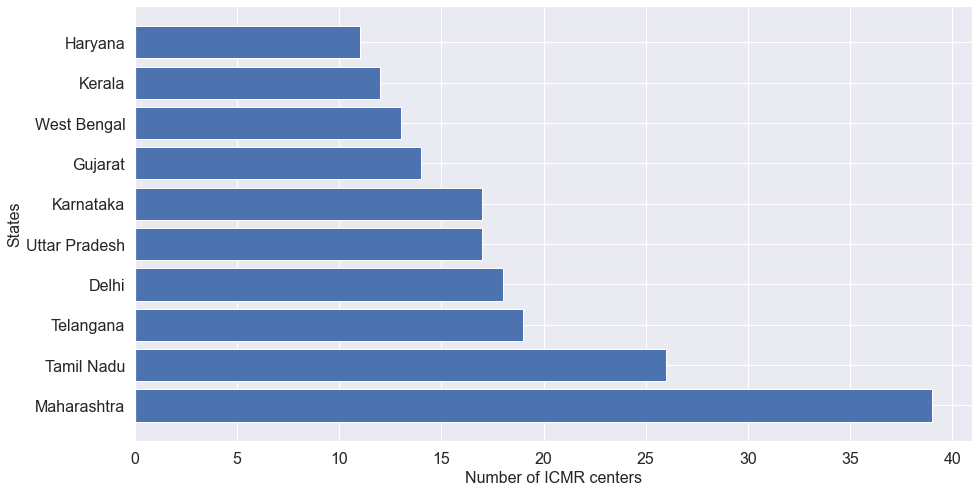

In [22]:
icmr = df_icmr['state'].value_counts().sort_values(ascending = False)[:10]
index = icmr.index
values = icmr.values
plt.figure(figsize = (15, 8))
plt.barh(index, values)
plt.xlabel('Number of ICMR centers', fontsize = 16)
plt.ylabel('States', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Maharashtra has the highest number of ICMR centers.

**AgeGroupDetails.csv**

In [25]:
df_age = pd.read_csv('data/AgeGroupDetails.csv')
df_age

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


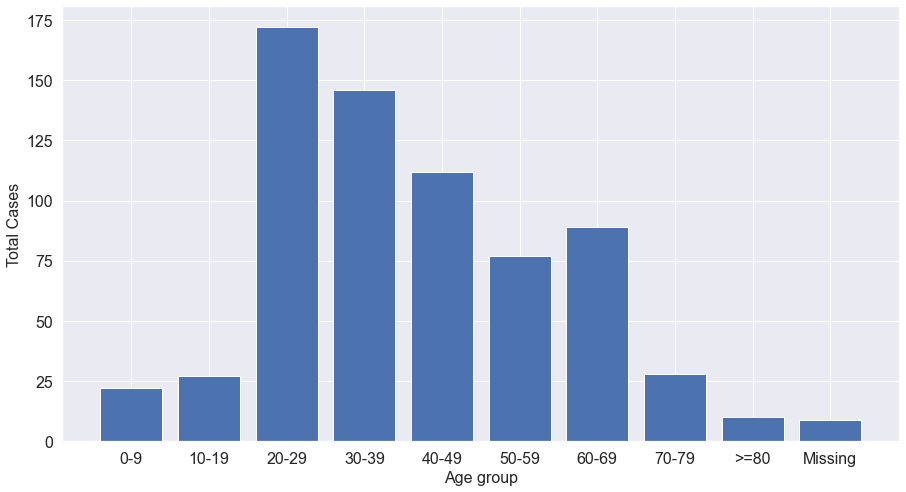

In [26]:
plt.figure(figsize = (15, 8))
plt.bar(df_age['AgeGroup'], df_age['TotalCases'])
plt.xlabel('Age group', fontsize = 16)
plt.ylabel('Total Cases', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Most people in the range from 20-50 have contracted covid